In [1]:
import sys
import os 
# current working directory
path = os.getcwd()
# parent directory
parent = os.path.join(path, os.pardir)
sys.path.append(os.path.abspath(parent))
from bayes_opt1 import BayesianOptimization
from bayes_opt1 import UtilityFunction
from plot_gp_function import plot_gp
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

from scipy.stats import norm
from scipy.optimize import minimize
from plot_gp_function import plot_convergence
from plot_gp_function import plot_simple_regret

# Comparative analysis on acquisition functions

In [2]:
x = np.linspace(-2, 10, 10000).reshape(-1,1)

def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)  #

optimizer1 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer2 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer3 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)

params = {'ucb': {'kappa': 5, 'xi': 0}, 'ei': {'xi': 0}, 'poi': {'xi': 0.01}}

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |


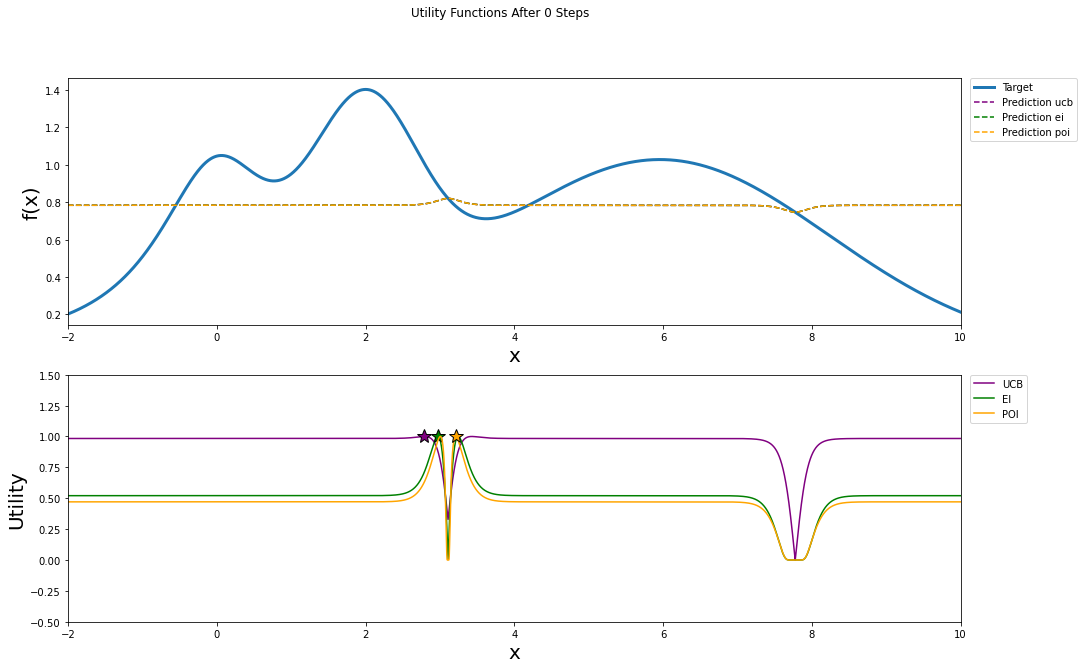

In [3]:
optimizer1.maximize(init_points=2, n_iter=0, kappa=5)
optimizer2.maximize(init_points=2, n_iter=0,acq='ei')
optimizer3.maximize(init_points=2, n_iter=0,acq='poi')
plot_gp(optimizer1,optimizer2,optimizer3, x, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |
|  4        |  0.7581   |  4.061    |
|  5        |  0.2118   |  10.0     |
|  6        |  1.027    |  6.037    |
|  7        |  1.05     |  1.225    |
|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |
|  4        |  0.7581   |  4.061    |
|  5        |  1.331    |  2.293    |
|  6        |  0.7239   |  3.834    |
|  7        |  1.402    |  1.999    |
|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.5234   | -0.9694   |
|  4        |  0.7581   |  4.061    |
|  5        |  0.8234   |  3.101    |
|  6        |  0.8255   |  3.096    |
|  7        |  0.8293   |  3.088    |


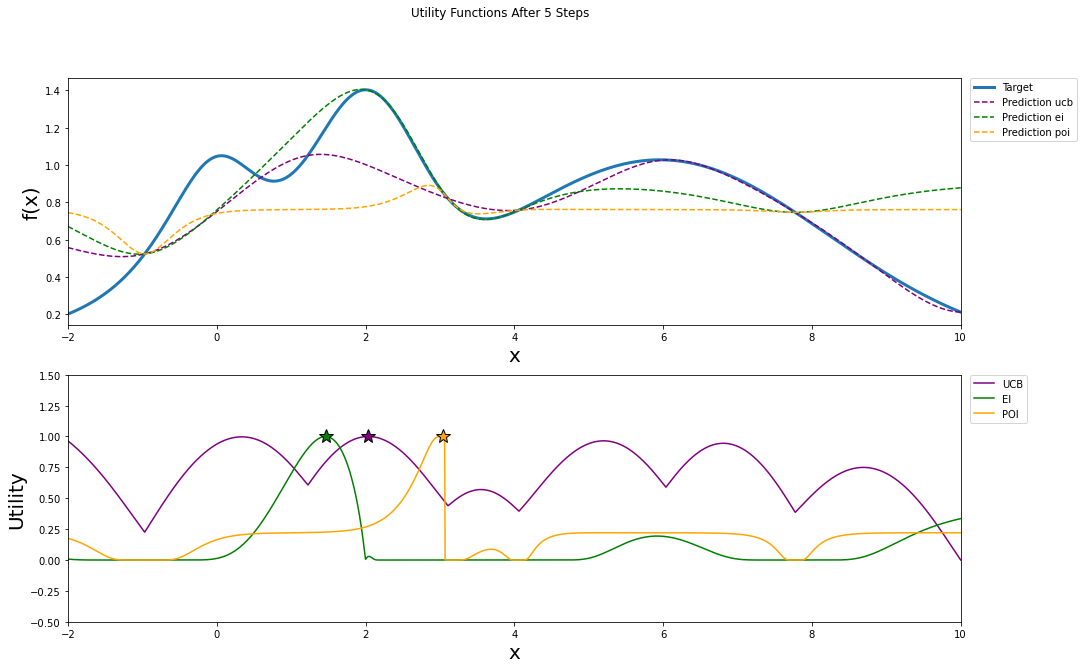

In [4]:
optimizer1.maximize(init_points=0, n_iter=5, kappa=5)
optimizer2.maximize(init_points=0, n_iter=5,acq='ei')
optimizer3.maximize(init_points=0, n_iter=5,acq='poi')
plot_gp(optimizer1,optimizer2,optimizer3, x, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.401    |  2.037    |
|  9        |  0.9629   |  5.124    |
|  10       |  0.2017   | -2.0      |
|  11       |  1.041    |  0.1696   |
|  12       |  0.9483   |  6.867    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.195    |  1.462    |
|  9        |  0.2119   |  10.0     |
|  10       |  1.027    |  5.991    |
|  11       |  1.4      |  2.042    |
|  12       |  0.202    | -1.998    |
|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.847    |  3.052    |
|  9        |  0.8664   |  3.015    |
|  10       |  0.8696   |  3.009    |
|  11       |  0.9036   |  2.949    |
|  12       |  0.9539   |  2.868    |


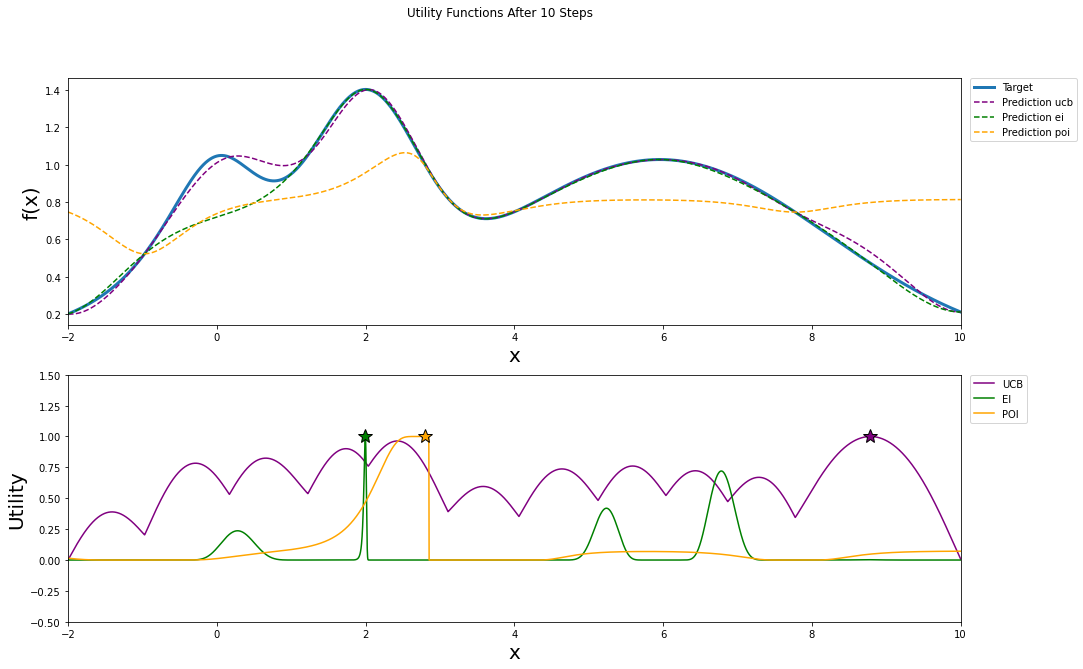

In [5]:
optimizer1.maximize(init_points=0, n_iter=5, kappa=5)
optimizer2.maximize(init_points=0, n_iter=5,acq='ei')
optimizer3.maximize(init_points=0, n_iter=5,acq='poi')
plot_gp(optimizer1,optimizer2,optimizer3, x, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  13       |  0.4729   |  8.786    |
|  14       |  1.265    |  2.414    |
|  15       |  1.351    |  1.753    |
|  16       |  1.398    |  1.933    |
|  17       |  1.402    |  1.993    |
|   iter    |  target   |     x     |
-------------------------------------
|  13       |  1.402    |  1.996    |
|  14       |  0.9618   |  6.783    |
|  15       |  1.402    |  1.999    |
|  16       |  1.402    |  2.001    |
|  17       |  1.402    |  1.999    |
|   iter    |  target   |     x     |
-------------------------------------
|  13       |  0.9699   |  2.844    |
|  14       |  0.9935   |  2.809    |
|  15       |  1.131    |  2.614    |
|  16       |  1.14     |  2.602    |
|  17       |  1.165    |  2.567    |


/Users/martina/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


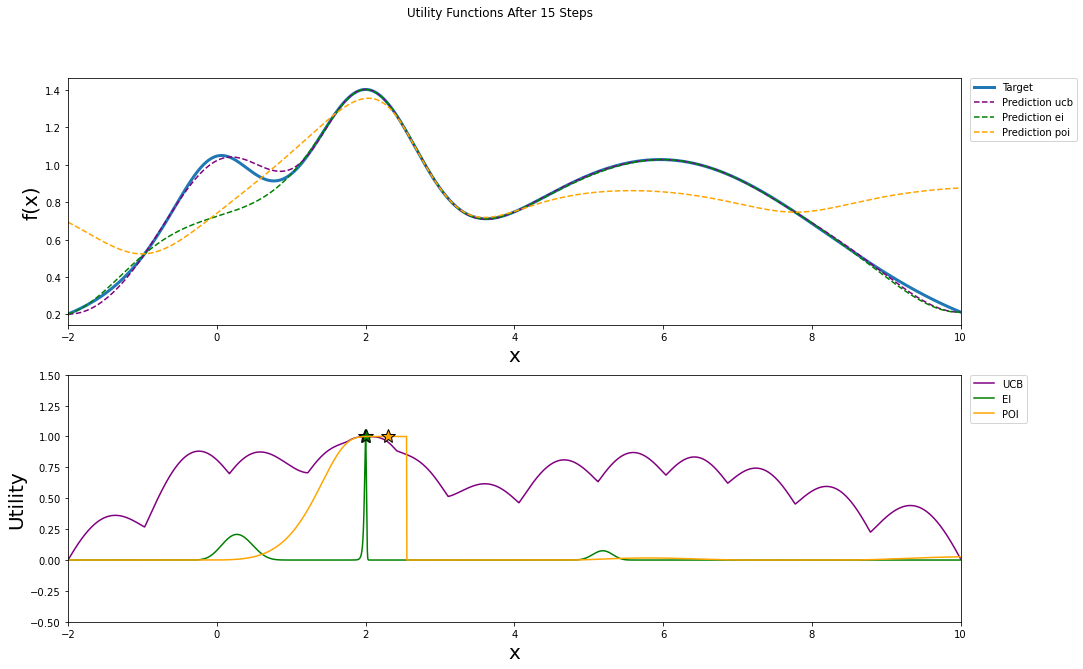

In [6]:
optimizer1.maximize(init_points=0, n_iter=5, kappa=5)
optimizer2.maximize(init_points=0, n_iter=5,acq='ei')
optimizer3.maximize(init_points=0, n_iter=5,acq='poi')
plot_gp(optimizer1,optimizer2,optimizer3, x, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  18       |  1.402    |  1.997    |
|  19       |  1.402    |  1.998    |
|  20       |  1.402    |  2.0      |
|  21       |  1.402    |  2.001    |
|  22       |  1.402    |  1.998    |
|   iter    |  target   |     x     |
-------------------------------------
|  18       |  1.402    |  1.999    |
|  19       |  1.402    |  2.0      |
|  20       |  1.402    |  2.001    |
|  21       |  1.402    |  2.001    |
|  22       |  1.402    |  2.002    |
|   iter    |  target   |     x     |
-------------------------------------
|  18       |  1.216    |  2.492    |
|  19       |  1.283    |  2.383    |
|  20       |  1.32     |  2.316    |
|  21       |  1.328    |  2.298    |
|  22       |  1.341    |  2.27     |


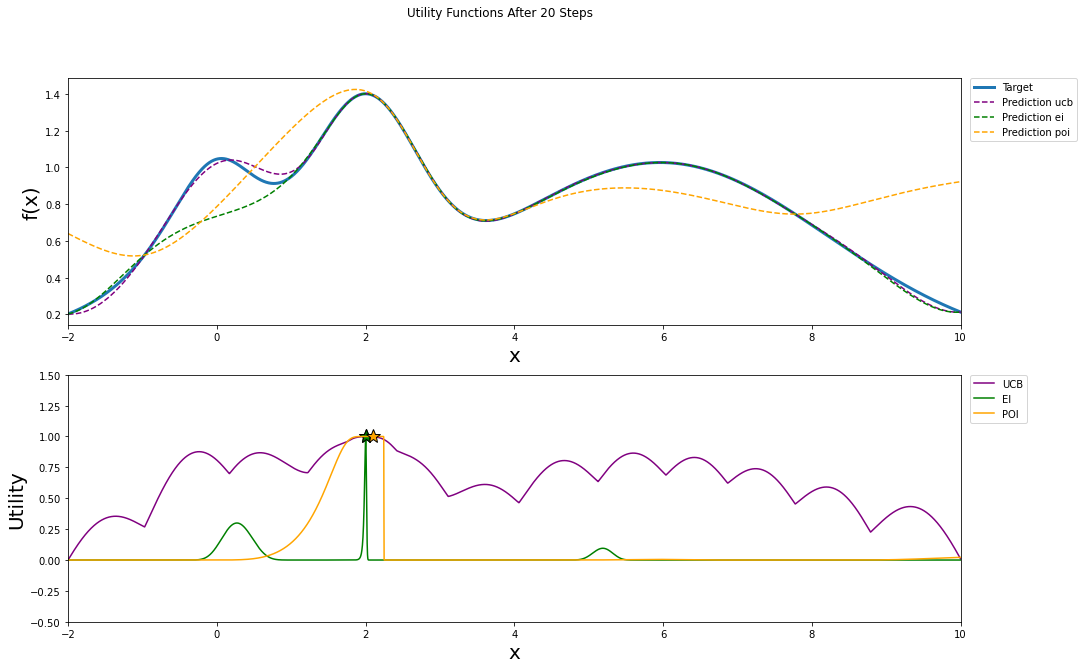

In [7]:
optimizer1.maximize(init_points=0, n_iter=5, kappa=5)
optimizer2.maximize(init_points=0, n_iter=5,acq='ei')
optimizer3.maximize(init_points=0, n_iter=5,acq='poi')
plot_gp(optimizer1,optimizer2,optimizer3, x, target, params)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|  3        |  0.7247   |  3.428    |
|  3        |  0.89     |  2.972    |
|  3        |  0.7785   |  3.211    |
|  4        |  1.026    |  5.855    |
|  4        |  1.026    |  5.855    |
|  4        |  1.026    |  5.855    |
|  5        |  1.027    |  5.893    |
|  5        |  1.026    |  5.855    |
|  5        |  1.024    |  5.77     |
|  6        |  1.225    |  1.51     |
|  6        |  1.027    |  6.02     |
|  6        |  1.025    |  6.1      |
|  7        |  1.049    |  0.07432  |
|  7        |  1.002    |  5.441    |
|  7        

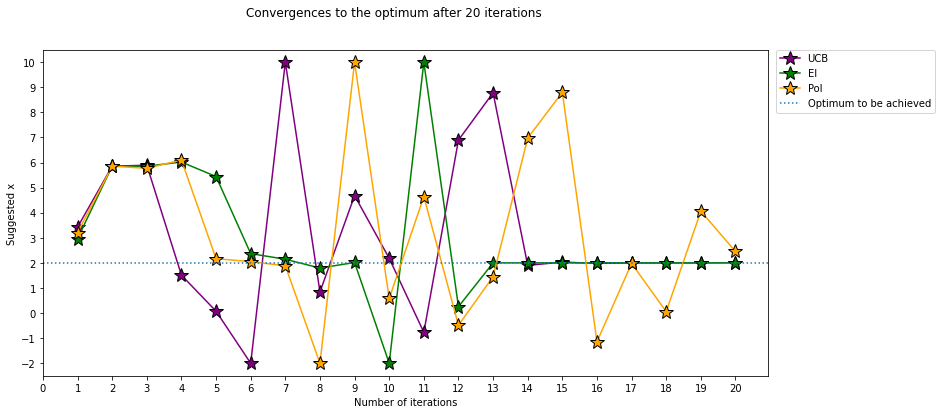

In [8]:
optimizer1 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer2 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer3 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer1.maximize(init_points=2, n_iter=0, kappa=1.5)
optimizer2.maximize(init_points=2, n_iter=0,acq='ei')
optimizer3.maximize(init_points=2, n_iter=0,acq='poi')
plot_convergence(optimizer1,optimizer2,optimizer3, x, target, params)

# Plot of the simple regret 

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |
|  3        |  0.7247   |  3.428    |
|  3        |  0.89     |  2.972    |
|  3        |  0.7785   |  3.211    |
|  4        |  1.026    |  5.855    |
|  4        |  1.026    |  5.855    |
|  4        |  1.026    |  5.855    |
|  5        |  1.027    |  5.893    |
|  5        |  1.026    |  5.855    |
|  5        |  1.024    |  5.77     |
|  6        |  1.225    |  1.51     |
|  6        |  1.027    |  6.02     |
|  6        |  1.025    |  6.1      |
|  7        |  1.049    |  0.07432  |
|  7        |  1.002    |  5.441    |
|  7        

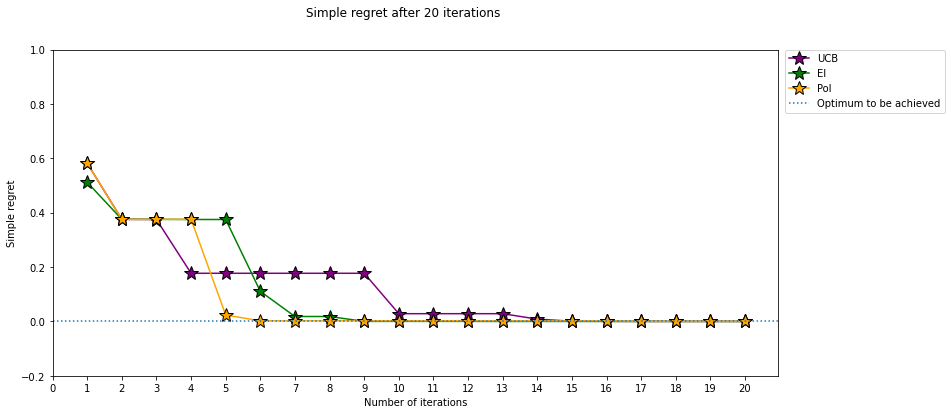

In [9]:
optimizer1 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer2 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer3 = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)
optimizer1.maximize(init_points=2, n_iter=0, kappa=1.5)
optimizer2.maximize(init_points=2, n_iter=0,acq='ei')
optimizer3.maximize(init_points=2, n_iter=0,acq='poi')
plot_simple_regret(optimizer1,optimizer2,optimizer3, x, target, params)

# Objective function affected by noise

In [2]:
x = np.linspace(-2, 10, 10000).reshape(-1,1)

def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)  

optimizerNoise = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27, noise = 0.5)

In [3]:
optimizerNoise.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  2.159    |  3.109    |
|  2        |  3.259    |  7.775    |


In [4]:
optimizerNoise.maximize(init_points=0, n_iter=3, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.1861   |  7.456    |
|  4        | -2.092    |  5.855    |
|  5        |  4.006    |  3.109    |
